## MCMC

Monte Carlo method, as a statistical simulation and approximate calculation method, is a method of approximate numerical calculation by random sampling of probability models. Markov Chain is a random sequence with Markov properties. Combining these two, there is a Markov Chain Monte Carlo method (MCMC), which is a Monte Carlo method that based on constructing a Markov chain as a probability model.

In general, random sampling of the target probability model yields an approximate numerical solution to the distribution. But if the random variable is multivariate, or the probability density function to be sampled is a complex non-standard form, it will be difficult to directly apply the Monte Carlo method.

The basic idea of MCMC is to define a Markov Chain $X=\{X_{0}, X_{1},\cdots, X_{t},\cdots \}$ on the state space $S$ of random variable $x$ and make the stationary distribution to be the sampled target distribution $p(x)$. Then perform random walk based on the Markov chain to generate the corresponding sample sequence for numerical calculation. When the time is long enough, the distribution obtained by sampling will approach a stationary distribution, and the sampling result based on the Markov chain is the sampling result of the target probability distribution. The calculation of the functional mean of the sampling results is the target mathematical expectation
value.

Therefore, the full MCMC method can be summed up in the following three steps:

(1) Define a Markov chain that satisfies the ergodic theorem on the state space of random variables, making its stationary distribution the target distribution $p(x)$

(2) Starting from a certain point $x_{0}$ in the state space, a random walk is performed on the constructed Markov chain to obtain the sample sequence $x_{0}, x_{1},\cdots, x_{t},\cdots$.

(3) Determine the positive integers $m$ and $n$ based on the ergodic theorem of Markov chain, the sample set $\{x_{m+1}, x_{m+2},\cdots, x_{n} \}$ can be obtained, then calculate the ergodic mean of $f(x): \enspace \hat{E}f=\frac{1}{n-m} \sum^{n}_{i=m+1}f(x_{i})$

The key for MCMC is to construct a Markov chain that satisfies the conditions, commonly used methods for constructing MCMC are Metropolis-Hasting algorithm and Gibbs sampling.

### Metropolis-Hasting algorithm

Metropolis-Hasting algorithm is also called as M-H sampling. Assuming that the target sampling distribution is $p(x)$, the  state transition kernel that M-H algorithm uses is $p(x, x^{\prime})$, then the Markov chain can be defined as $p(x, x^{\prime})=q(x, x^{\prime}) \alpha(x, x^{\prime})$

$q(x, x^{\prime})$ and  $\alpha(x, x^{\prime})$ are proposal distribution and acceptance distribution. The proposal distribution can be another transition kernel of Markov chain or many other forms, including symmetric form and independent sampling form. Assuming that proposal distribution is symmetric, for any $x$ and $x^{\prime}$, there is:
$$
q(x, x^{\prime}) = q(x^{\prime}, x)
$$

The form of acceptance distribution is shown as follow:
$$
\alpha (x, x^{\prime}) = \min \{1, \frac{p(x^{\prime})q(x^{\prime},x)}{p(x)q(x,x^{\prime})} \}
$$

The random walk process of a Markov chain with transition kernel $p(x, x^{\prime})$ is as follows. If state $x$ is valid at $t-1$ moment, that is, $x_{t-1}=x$. Then sample a candidate state $x^{\prime}$ according to proposal distribution, and decide whether to accept state $x^{\prime}$ based on sampling from acceptance distribution. There is $\alpha (x, x^{\prime})$ chance that $x^{\prime}$ will be accepted and $1-\alpha (x, x^{\prime})$ chance that it will be rejected. The complete Metropolis-Hasting algorithm process is as follows:

(1) Randomly choose an initialized value $x_{0}$ on state space.

(2) Iterate the following for $i=1,2,\cdots, n$

• Set the state $x_{t-1}=x$, and sample a candidate state $x^{\prime}$ according to proposal distribution $q(x, x^{\prime})$.

• Calculate the acceptance probability $\alpha (x, x^{\prime}) = \min \{1, \frac{p(x^{\prime})q(x^{\prime},x)}{p(x)q(x,x^{\prime})} \}$

• Randomly select a number $u$ from uniform distribution on $[0,1]$. If $u \ge \alpha (x, x^{\prime})$, the new state value is $x_{i}=x^{\prime} $. Otherwise, $x_{i}=x_{0}$

(3) Obtain the sample set $\{x_{m+1}, x_{m+2},\cdots, x_{n} \}$ and calculate $f_{mn}=\frac{1}{n-m} \sum^{n}_{i=m+1}f(x_{i})$

In [1]:
from scipy.stats import norm
import random
import matplotlib.pyplot as plt

In [2]:
def smooth_dist(theta):
    y = norm.pdf(theta, loc=3, scale=2)
    return y

In [3]:
T = 10000
pi = [0 for i in range(T)] 
sigma = 1
# set the initialized value
t = 0
# begin iteration
while t < T-1:
    t=t + 1
    # random sampling in state transition
    pi_star = norm.rvs(loc=pi[t - 1], scale=sigma, size=1, random_state=None)
    # calculate acceptance probability
    alpha = min(1, (smooth_dist(pi_star[0]) / smooth_dist(pi[t - 1])))
    # choose a number in uniform distribution
    u = random.uniform(0, 1)
    # accept or reject
    if u < alpha:
        pi[t] = pi_star[0]
    else:
        pi[t] = pi[t - 1]

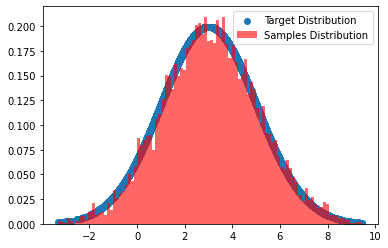

In [5]:
plt.scatter(pi, norm.pdf(pi, loc=3, scale=2), label='Target Distribution')
num_bins = 100
plt.hist(pi, 
        num_bins,
        density=1,
        facecolor='red',
        alpha=0.6,
        label='Samples Distribution')
plt.legend()
plt.show()

### Gibbs sampling

Compared with M-H sampling, Gibbs sampling is a more commonly used MCMC sampling algorithm, and Gibbs sampling can be regarded as a special M-H sampling method. Gibbs sampling is suitable for sampling and estimation of the joint distribution of multivariate random variables. The basic idea is to define the full conditional probability distribution from the joint probability distribution, and sequentially sample from the full conditional probability distribution to obtain the target sample sequence.

Assuming that the target distribution of MCMC is a multivariate joint probability distribution $p(x)=p(x_{1},x_{2},\cdots,x_{k})$, if all $k$ variables of conditional probability distribution $p(x_{I}|x_{-I})$ appear, and $x_{I}= \{x_{i}, i \in I \}$, $\enspace x_{-I}= \{x_{i}, i \notin I \}$. This kind of conditional probability distribution is full conditional probability distribution.

The complete flow of Gibbs sampling is as follows:

(1) Given the initial value of multi-random variable: $x^{(0)}=(x^{(0)}_{1}, x^{(0)}_{2}, \cdots, x^{(0)}_{k})^{\top}$

(2) Iteration for $i=\{1,2,\cdots,n\}$, assuming that the sample $(x^{i-1}_{1},x^{i-1}_{2},\cdots,x^{i-1}_{k})$ are obtained in the $(i-1)$-th step, then the $i$-th iteration performs the following steps:

• Sample $x^{i}_{1}$ from full conditional distribution $p(x_{1}|x^{i-1}_{2},\cdots,x^{i-1}_{k})$

• Sample $x^{i}_{j}$ from full conditional distribution $p(x_{j}|x^{i}_{1},\cdots,x^{j-1}_{i},x^{j-1}_{j+1}, \cdots, x^{i-1}_{k})$

• Sample $x^{i}_{k}$ from full conditional distribution $p(x_{k}|x^{i}_{1},\cdots,x^{i}_{k-1})$

(3) Obtain the sample set $\{x_{m+1}, x_{m+2},\cdots, x_{n} \}$ and calculate $f_{mn}=\frac{1}{n-m} \sum^{n}_{i=m+1}f(x_{i})$

Gibbs sampling can be regarded as a special case of one-component M-H sampling. That is, Gibbs sampling accepts each sampling result with a probability of 100% (never rejects it) because Gibbs sampling does not stop on some samples. Gibbs sampling is suitable for the case where the full conditional distribution is easy to sample, while the one-component M-H algorithm is suitable for the case where the full conditional distribution is not easy to sample.

In [6]:
import math
from scipy.stats import multivariate_normal

# set bivariate normal distribution means and covariance matrices
samplesource = multivariate_normal(mean=[5,-1], cov=[[1,0.5],[0.5,2]])

In [7]:
# conditional state transition distribution of y under the condition of x
def p_yx(x, m1, m2, s1, s2):
    return (random.normalvariate(m2 + rho * s2 / s1 * (x - m1), math.sqrt(1 - rho ** 2)))

# conditional state transition distribution of x under the condition of y
def p_xy(y, m1, m2, s1, s2):
    return (random.normalvariate(m2 + rho * s1 / s2 * (y - m2), math.sqrt(1 - rho ** 2)))

In [9]:
# set the parameters
N, K= 5000, 20
x_res = []
y_res = []
z_res = []
m1, m2 = 5, -1
s1, s2 = 1, 2
rho, y = 0.5, m2

# iteration
for i in range(N):
    for j in range(K):
        x = p_xy(y, m1, m2, s1, s2)
        y = p_yx(x, m1, m2, s1, s2)
        z = samplesource.pdf([x,y])
        x_res.append(x)
        y_res.append(y)
        z_res.append(z)

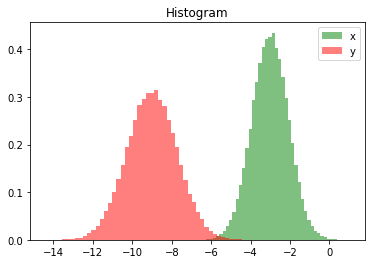

In [12]:
num_bins = 50
plt.hist(x_res, num_bins, density=1, facecolor='green', alpha=0.5,label='x')
plt.hist(y_res, num_bins, density=1, facecolor='red', alpha=0.5,label='y')
plt.title('Histogram')
plt.legend()
plt.show()